# Analyse des résultats au brevet et étude démographique

Voici un exemple décrit pas à pas qui montre comment on analyse des données publiques disponibles en ligne. Ici on va travailler sur le prix de différentes énergies à partir des données de la base Pégase du ministère du développement durable.

La première chose est de sauver les tables qui nous intéressent à savoir 
* les données annuelles par commune, département, secteur des inscriptions au brevet, taux de réussite.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dbpath = 'data/fr-en-dnb-par-etablissement.csv'

In [3]:
brevet_data = pd.read_csv(dbpath, sep=';')

brevet_data.head()

,Session,Numero d'etablissement,Type d'etablissement,Patronyme,Secteur d'enseignement,Commune,Libellé commune,Code département,Libellé département,Code académie,...,Code région,Libellé région,Inscrits,Presents,Admis,Admis sans mention,Nombre_d_admis_Mention_AB,Admis Mention bien,Admis Mention très bien,Taux de réussite
0,2014,0131711P,COLLEGE,ROCHER DU DRAGON,PUBLIC,13001,AIX-EN-PROVENCE,013,BOUCHES-DU-RHONE,2,...,18,PROVENCE-ALPES-COTE D'AZUR,163,159,143,52,43,29,19,"89,90%"
1,2014,0131756N,COLLEGE,DARIUS MILHAUD,PUBLIC,13212,MARSEILLE 12E ARRONDISSEMENT,013,BOUCHES-DU-RHONE,2,...,18,PROVENCE-ALPES-COTE D'AZUR,153,143,109,49,25,21,14,"76,20%"
2,2014,0131923V,COLLEGE,MARSEILLEVEYRE,PUBLIC,13208,MARSEILLE 8E ARRONDISSEMENT,013,BOUCHES-DU-RHONE,2,...,18,PROVENCE-ALPES-COTE D'AZUR,262,256,236,63,81,59,33,"92,10%"
3,2014,0131943S,COLLEGE,PIERRE PUGET,PUBLIC,13206,MARSEILLE 6E ARRONDISSEMENT,013,BOUCHES-DU-RHONE,2,...,18,PROVENCE-ALPES-COTE D'AZUR,157,153,114,46,31,24,13,"74,50%"
4,2014,0131968U,COLLEGE,CAILLOLS (QUARTIER DES),PUBLIC,13212,MARSEILLE 12E ARRONDISSEMENT,013,BOUCHES-DU-RHONE,2,...,18,PROVENCE-ALPES-COTE D'AZUR,138,138,106,45,31,20,10,"76,80%"


# Cleaning data

In [4]:
# On enlève les 0 devant les codes des départements
brevet_data['Code département'] = brevet_data['Code département'].map(lambda x: str(x)[1:])

# On renomme les colonnes des mentions
brevet_data.rename(columns = {'Nombre_d_admis_Mention_AB':'Admis Mention AB', 'Admis Mention bien':'Admis Mention B', 'Admis Mention très bien':'Admis Mention TB'}, inplace = True)

# Admis avec mention bien ou plus
brevet_data['Admis Mention B+'] = brevet_data['Admis Mention B'] + brevet_data['Admis Mention TB']

# Admis avec mention  assez bien ou plus (avec mention)
brevet_data['Admis Mention AB+'] = brevet_data['Admis Mention AB'] + brevet_data['Admis Mention B+']

# Taux de réussite
brevet_data['Taux de réussite'] =  brevet_data['Admis'] / brevet_data['Presents']
brevet_data

,Session,Numero d'etablissement,Type d'etablissement,Patronyme,Secteur d'enseignement,Commune,Libellé commune,Code département,Libellé département,Code académie,...,Inscrits,Presents,Admis,Admis sans mention,Admis Mention AB,Admis Mention B,Admis Mention TB,Taux de réussite,Admis Mention B+,Admis Mention AB+
0,2014,0131711P,COLLEGE,ROCHER DU DRAGON,PUBLIC,13001,AIX-EN-PROVENCE,13,BOUCHES-DU-RHONE,2,...,163,159,143,52,43,29,19,0.899371,48,91
1,2014,0131756N,COLLEGE,DARIUS MILHAUD,PUBLIC,13212,MARSEILLE 12E ARRONDISSEMENT,13,BOUCHES-DU-RHONE,2,...,153,143,109,49,25,21,14,0.762238,35,60
2,2014,0131923V,COLLEGE,MARSEILLEVEYRE,PUBLIC,13208,MARSEILLE 8E ARRONDISSEMENT,13,BOUCHES-DU-RHONE,2,...,262,256,236,63,81,59,33,0.921875,92,173
3,2014,0131943S,COLLEGE,PIERRE PUGET,PUBLIC,13206,MARSEILLE 6E ARRONDISSEMENT,13,BOUCHES-DU-RHONE,2,...,157,153,114,46,31,24,13,0.745098,37,68
4,2014,0131968U,COLLEGE,CAILLOLS (QUARTIER DES),PUBLIC,13212,MARSEILLE 12E ARRONDISSEMENT,13,BOUCHES-DU-RHONE,2,...,138,138,106,45,31,20,10,0.768116,30,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130759,2020,0930623X,COLLEGE,JEAN MOULIN,PUBLIC,93049,NEUILLY-PLAISANCE,93,SEINE-SAINT-DENIS,24,...,190,190,166,40,30,36,60,0.873684,96,126
130760,2020,0930831Y,LYCEE PROFESSIONNEL,ARISTIDE BRIAND,PUBLIC,93007,LE BLANC-MESNIL,93,SEINE-SAINT-DENIS,24,...,19,19,17,9,4,2,2,0.894737,4,8
130761,2020,0930858C,COLLEGE,PABLO NERUDA,PUBLIC,93032,GAGNY,93,SEINE-SAINT-DENIS,24,...,146,146,114,32,27,24,31,0.780822,55,82
130762,2020,0930920V,COLLEGE,SAINTE MARIE,PRIVE,93072,STAINS,93,SEINE-SAINT-DENIS,24,...,110,110,104,25,31,25,23,0.945455,48,79


In [5]:
brevet_data2 = brevet_data.set_index(['Session', "Numero d'etablissement"])
brevet_data2

Type d'etablissement  \
Session Numero d'etablissement                        
2014    0131711P                            COLLEGE   
        0131756N                            COLLEGE   
        0131923V                            COLLEGE   
        0131943S                            COLLEGE   
        0131968U                            COLLEGE   
...                                             ...   
2020    0930623X                            COLLEGE   
        0930831Y                LYCEE PROFESSIONNEL   
        0930858C                            COLLEGE   
        0930920V                            COLLEGE   
        0930969Y                            COLLEGE   

                                                  Patronyme  \
Session Numero d'etablissement                                
2014    0131711P                           ROCHER DU DRAGON   
        0131756N                             DARIUS MILHAUD   
        0131923V                             MARSEILLEVEYRE   
        0131943S                               PIERRE PUGET   
        0131968U                    CAILLOLS (QUARTIER DES)   
...                                                     ...   
2020    0930623X                                JEAN MOULIN   
        0930831Y                            ARISTIDE BRIAND   
        0930858C                               PABLO NERUDA   
        0930920V                               SAINTE MARIE   
        0930969Y                SAINT LOUIS-SAINTE CLOTILDE   

                               Secteur d'enseignement Commune  \
Session Numero d'etablissement                                  
2014    0131711P                               PUBLIC   13001   
        0131756N                               PUBLIC   13212   
        0131923V                               PUBLIC   13208   
        0131943S                               PUBLIC   13206   
        0131968U                               PUBLIC   13212   
...                                               ...     ...   
2020    0930623X                               PUBLIC   93049   
        0930831Y                               PUBLIC   93007   
        0930858C                               PUBLIC   93032   
        0930920V                                PRIVE   93072   
        0930969Y                                PRIVE   93062   

                                              Libellé commune  \
Session Numero d'etablissement                                  
2014    0131711P                              AIX-EN-PROVENCE   
        0131756N                MARSEILLE 12E  ARRONDISSEMENT   
        0131923V                 MARSEILLE 8E  ARRONDISSEMENT   
        0131943S                MARSEILLE  6E  ARRONDISSEMENT   
        0131968U                MARSEILLE 12E  ARRONDISSEMENT   
...                                                       ...   
2020    0930623X                            NEUILLY-PLAISANCE   
        0930831Y                              LE BLANC-MESNIL   
        0930858C                                        GAGNY   
        0930920V                                       STAINS   
        0930969Y                                    LE RAINCY   

                               Code département Libellé département  \
Session Numero d'etablissement                                        
2014    0131711P                             13    BOUCHES-DU-RHONE   
        0131756N                             13    BOUCHES-DU-RHONE   
        0131923V                             13    BOUCHES-DU-RHONE   
        0131943S                             13    BOUCHES-DU-RHONE   
        0131968U                             13    BOUCHES-DU-RHONE   
...                                         ...                 ...   
2020    0930623X                             93   SEINE-SAINT-DENIS   
        0930831Y                             93   SEINE-SAINT-DENIS   
        0930858C                             93   SEINE-SAINT-DENIS   
        0930920V      

## Notre collège

In [6]:
brevet_data[brevet_data["Patronyme"] == "LES FRANCS BOURGEOIS"]

,Session,Numero d'etablissement,Type d'etablissement,Patronyme,Secteur d'enseignement,Commune,Libellé commune,Code département,Libellé département,Code académie,...,Inscrits,Presents,Admis,Admis sans mention,Admis Mention AB,Admis Mention B,Admis Mention TB,Taux de réussite,Admis Mention B+,Admis Mention AB+
13455,2013,0752902X,COLLEGE,LES FRANCS BOURGEOIS,PRIVE,75104,PARIS 4E ARRONDISSEMENT,75,PARIS,1,...,240,240,240,15,78,99,48,1.000000,147,225
14479,2009,0752902X,COLLEGE,LES FRANCS BOURGEOIS,PRIVE,75104,PARIS 4E ARRONDISSEMENT,75,PARIS,1,...,231,230,228,30,85,88,25,0.991304,113,198
17711,2020,0752902X,COLLEGE,LES FRANCS BOURGEOIS,PRIVE,75104,PARIS 4E ARRONDISSEMENT,75,PARIS,1,...,260,260,260,20,41,102,97,1.000000,199,240
40071,2014,0752902X,COLLEGE,LES FRANCS BOURGEOIS,PRIVE,75104,PARIS 4E ARRONDISSEMENT,75,PARIS,1,...,258,258,258,29,81,101,47,1.000000,148,229
41923,2011,0752902X,COLLEGE,LES FRANCS BOURGEOIS,PRIVE,75104,PARIS 4E ARRONDISSEMENT,75,PARIS,1,...,249,249,248,26,104,90,28,0.995984,118,222
57939,2012,0752902X,COLLEGE,LES FRANCS BOURGEOIS,PRIVE,75104,PARIS 4E ARRONDISSEMENT,75,PARIS,1,...,246,246,245,17,65,102,61,0.995935,163,228
65156,2007,0752902X,COLLEGE,LES FRANCS BOURGEOIS,PRIVE,75104,PARIS 4E ARRONDISSEMENT,75,PARIS,1,...,234,231,228,30,69,90,39,0.987013,129,198
73468,2017,0752902X,COLLEGE,LES FRANCS BOURGEOIS,PRIVE,75104,PARIS 4E ARRONDISSEMENT,75,PARIS,1,...,255,255,254,36,34,75,109,0.996078,184,218
93499,2008,0752902X,COLLEGE,LES FRANCS BOURGEOIS,PRIVE,75104,PARIS 4E ARRONDISSEMENT,75,PARIS,1,...,236,235,234,33,97,81,23,0.995745,104,201
109022,2010,0752902X,COLLEGE,LES FRANCS BOURGEOIS,PRIVE,75104,PARIS 4E ARRONDISSEMENT,75,PARIS,1,...,248,247,246,22,89,93,42,0.995951,135,224


# Moyennes des taux de réussite des établissements par département

In [7]:
import folium

In [8]:
france = folium.Map(location=[46.5,2], zoom_start=5, tiles='Stamen Toner')

colors = folium.Choropleth(geo_data = 'data/departements-version-simplifiee.geojson',
                           data = brevet_data,
                           columns = ['Code département', 'Taux de réussite'],
                           key_on = 'feature.properties.code',
                           fill_color = 'YlOrRd',
                           fill_opacity = 0.6,
                           line_opacity = 0.2,
                           legend_name = "Taux de réussite"
                          )
colors.add_to(france)
folium.LayerControl().add_to(france)
france

## Number of students per session

In [9]:
presents_par_session = brevet_data.groupby('Session')['Presents'].sum()
presents_par_session

Session
2006    746534
2007    736961
2008    716484
2009    709965
2010    724086
2011    742462
2012    757587
2013    759891
2014    772825
2015    800531
2016    800995
2017    798720
2018    796930
2019    804116
2020    829164
Name: Presents, dtype: int64

# Taux de réussite par secteur (privé/public)

In [10]:
brevet_data.groupby('Secteur d\'enseignement')['Admis'].sum() / brevet_data.groupby('Secteur d\'enseignement')['Presents'].sum()

Secteur d'enseignement
-         0.833316
PRIVE     0.938826
PUBLIC    0.832538
dtype: float64

# On s'intéresse aux taux de réussite et de mentions par année selon le secteur d'enseignement (Public / Privé)

In [11]:
# On garde uniquement les établissements privés et publics
data_brevet_par_annee_par_secteur = brevet_data[brevet_data['Secteur d\'enseignement'] != "-"].groupby(['Session', 'Secteur d\'enseignement'])

In [12]:
# On fait les sommes des Présents, des Admis, des Admis avec mentions, des Admis avec mentions Bien ou Très Bien, et des admis avec mention Très Bien
data_brevet_par_annee_par_secteur = data_brevet_par_annee_par_secteur.agg(Presents = ('Presents', 'sum'),
                                      Admis = ('Admis', 'sum'),
                                      AvecMention = ('Admis Mention AB+', 'sum'),
                                      B_TB = ('Admis Mention B+', 'sum'),
                                      TB = ('Admis Mention TB', 'sum'))
data_brevet_par_annee_par_secteur

Presents   Admis  AvecMention    B_TB      TB
Session Secteur d'enseignement                                               
2006    PRIVE                     167677  150883        80736   32704    7676
        PUBLIC                    578204  441362       214951   94160   24799
2007    PRIVE                     166059  152241        93128   39808    9651
        PUBLIC                    570140  455193       254887  117829   33265
2008    PRIVE                     164841  151601        97500   42717   10871
        PUBLIC                    551042  443531       259699  123580   36801
2009    PRIVE                     163524  151631        95663   41132   10077
        PUBLIC                    545758  442229       254043  117940   33761
2010    PRIVE                     166526  155019       101023   45632   11945
        PUBLIC                    556928  455705       270505  131250   40034
2011    PRIVE                     170706  159731       102766   47821   13200
        PUBLIC                    571279  466684       268653  132114   42286
2012    PRIVE                     173380  163597       115196   56707   16709
        PUBLIC                    582916  485096       307721  160940   54720
2013    PRIVE                     173500  162898       109838   55497   17753
        PUBLIC                    585838  485212       291485  153432   55312
2014    PRIVE                     175206  164909       109791   54655   17055
        PUBLIC                    597041  497265       294864  153191   54923
2015    PRIVE                     180603  171324       123588   68180   24433
        PUBLIC                    619554  523622       334831  188821   76561
2016    PRIVE                     181505  173488       126216   70313   25483
        PUBLIC                    619144  528637       334917  188802   76188
2017    PRIVE                     181618  173291       145690  105963   55995
        PUBLIC                    616119  539564       421104  291261  155439
2018    PRIVE                     181395  171760       141669  101326   50687
        PUBLIC                    614903  526238       389514  259233  131902
2019    PRIVE                     182733  173046       138676   96362   46488
        PUBLIC                    620769  525857       375883  242408  120709
2020    PRIVE                     187299  181086       155521  118113   58769
        PUBLIC                    641379  569263       451252  332620  185715

# On calcule les taux en divisant les colonnes par le nombre d'élèves présents

In [13]:
cols_to_divide = ['Admis', 'AvecMention', 'B_TB', 'TB']
data_brevet_par_annee_par_secteur.loc[:, cols_to_divide] = data_brevet_par_annee_par_secteur.loc[:, cols_to_divide].div(data_brevet_par_annee_par_secteur['Presents'], axis=0)
data_brevet_par_annee_par_secteur = data_brevet_par_annee_par_secteur.reset_index()
data_brevet_par_annee_par_secteur

,Session,Secteur d'enseignement,Presents,Admis,AvecMention,B_TB,TB
0,2006,PRIVE,167677,0.899843,0.481497,0.195042,0.045778
1,2006,PUBLIC,578204,0.763333,0.371756,0.162849,0.042890
2,2007,PRIVE,166059,0.916789,0.560813,0.239722,0.058118
3,2007,PUBLIC,570140,0.798388,0.447060,0.206667,0.058345
4,2008,PRIVE,164841,0.919680,0.591479,0.259141,0.065948
5,2008,PUBLIC,551042,0.804895,0.471287,0.224266,0.066784
6,2009,PRIVE,163524,0.927271,0.585009,0.251535,0.061624
7,2009,PUBLIC,545758,0.810302,0.465487,0.216103,0.061861
8,2010,PRIVE,166526,0.930900,0.606650,0.274023,0.071731
9,2010,PUBLIC,556928,0.818248,0.485709,0.235668,0.071884


# On affiche les graphiques

In [14]:
import seaborn as sns

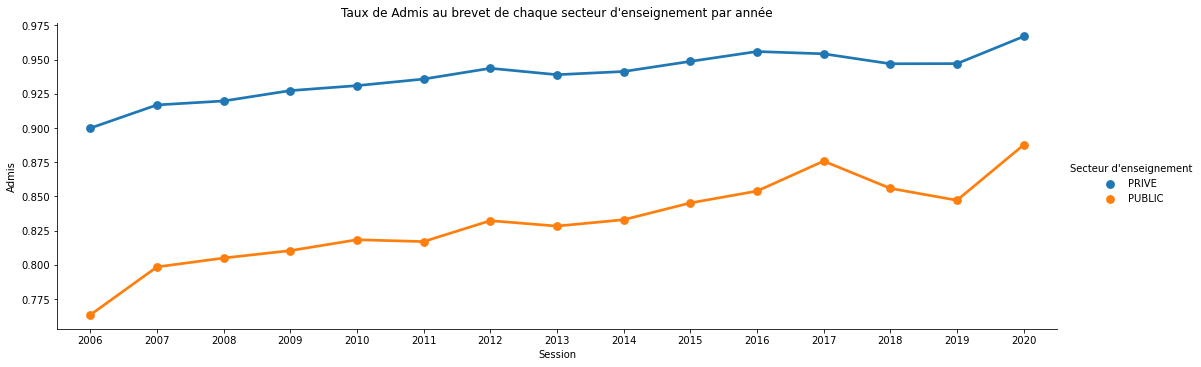

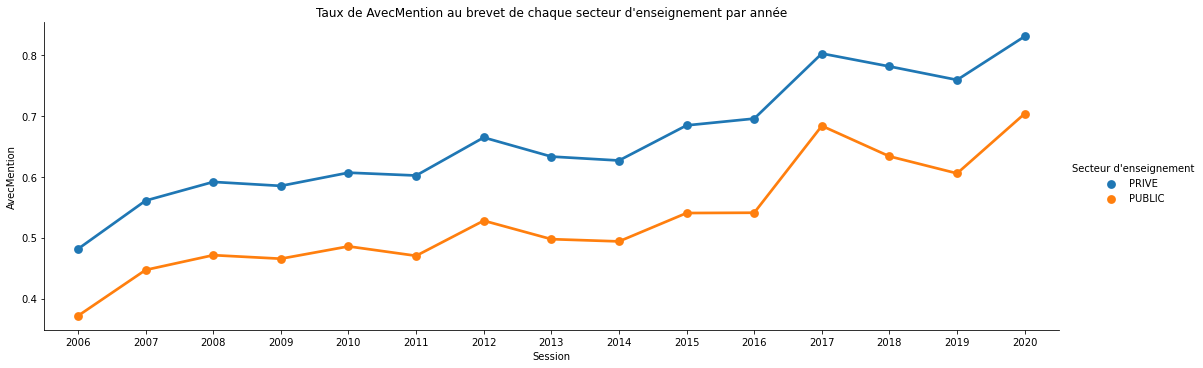

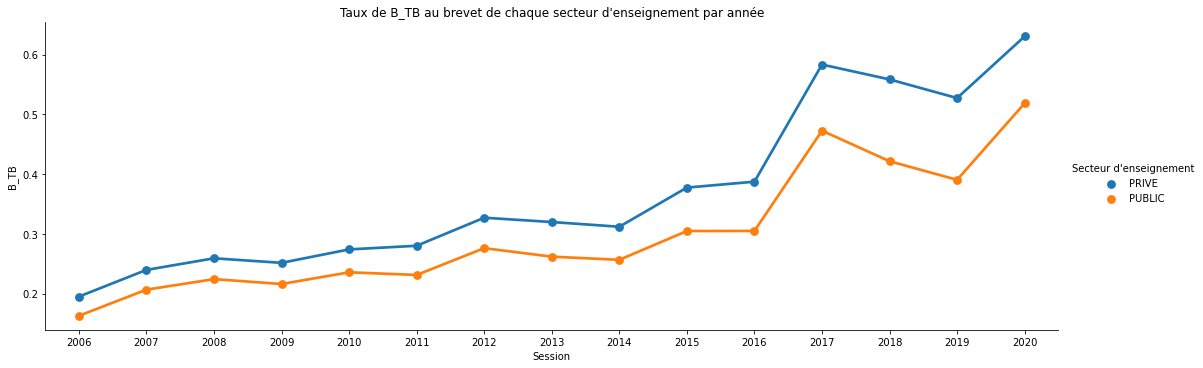

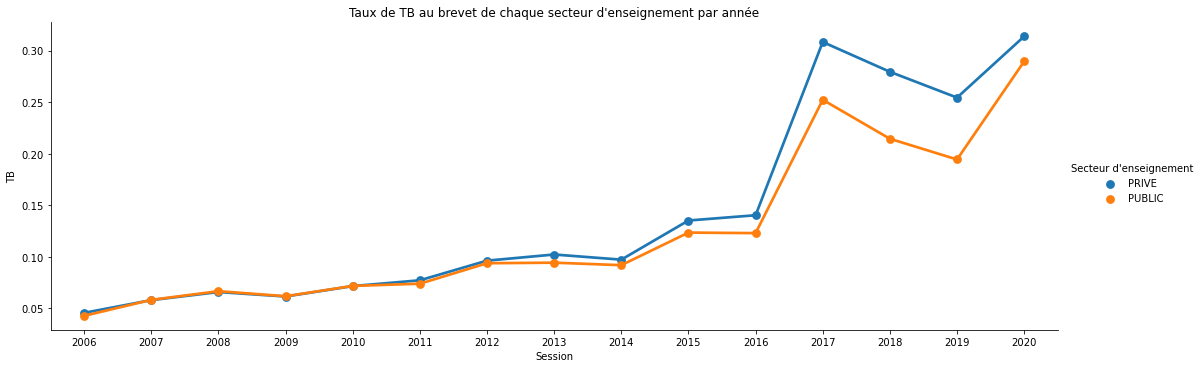

In [15]:
for c in cols_to_divide:
    g = sns.catplot(data=data_brevet_par_annee_par_secteur, x='Session', y = c, hue="Secteur d'enseignement", kind = 'point', aspect = 3, title = c)
    g.set(title=f"Taux de {c} au brevet de chaque secteur d'enseignement par année")
    #g.set(ylim = (0, 1))

Globalement le taux de réussite dans les lycées privés est plus élevé que dans les lycées publics.

Cependant l'écart se reserre, on passe d'une différence de 15% en 2006 à 7.5% en 2020.

On remarque une légère augmentation du taux réussite entre 2006 et 2020 pour les 2 secteurs.

Une chute du taux de réussite dans le secteur public est notable entre 2017 et 2019 ( -5% )

# Nombre d'inscrits par secteur

In [16]:
inscrits_secteur = brevet_data.groupby('Secteur d\'enseignement')['Inscrits'].sum()
inscrits_secteur

Secteur d'enseignement
-           10464
PRIVE     2638965
PUBLIC    9040378
Name: Inscrits, dtype: int64

# Calcul du nombre d'inscrits au brevet dans les plus grandes villes ( > 50 000 habitants ) 

In [17]:
# On remplace les arrondissements de Paris, Lyon et Marseille par leurs villes respectives
brevet_data['Libellé commune'] = brevet_data['Libellé commune'].replace(to_replace=r"([A-Z]+)[ ]+([0-9]+.*)", value=r"\1", regex=True)
brevet_data

,Session,Numero d'etablissement,Type d'etablissement,Patronyme,Secteur d'enseignement,Commune,Libellé commune,Code département,Libellé département,Code académie,...,Inscrits,Presents,Admis,Admis sans mention,Admis Mention AB,Admis Mention B,Admis Mention TB,Taux de réussite,Admis Mention B+,Admis Mention AB+
0,2014,0131711P,COLLEGE,ROCHER DU DRAGON,PUBLIC,13001,AIX-EN-PROVENCE,13,BOUCHES-DU-RHONE,2,...,163,159,143,52,43,29,19,0.899371,48,91
1,2014,0131756N,COLLEGE,DARIUS MILHAUD,PUBLIC,13212,MARSEILLE,13,BOUCHES-DU-RHONE,2,...,153,143,109,49,25,21,14,0.762238,35,60
2,2014,0131923V,COLLEGE,MARSEILLEVEYRE,PUBLIC,13208,MARSEILLE,13,BOUCHES-DU-RHONE,2,...,262,256,236,63,81,59,33,0.921875,92,173
3,2014,0131943S,COLLEGE,PIERRE PUGET,PUBLIC,13206,MARSEILLE,13,BOUCHES-DU-RHONE,2,...,157,153,114,46,31,24,13,0.745098,37,68
4,2014,0131968U,COLLEGE,CAILLOLS (QUARTIER DES),PUBLIC,13212,MARSEILLE,13,BOUCHES-DU-RHONE,2,...,138,138,106,45,31,20,10,0.768116,30,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130759,2020,0930623X,COLLEGE,JEAN MOULIN,PUBLIC,93049,NEUILLY-PLAISANCE,93,SEINE-SAINT-DENIS,24,...,190,190,166,40,30,36,60,0.873684,96,126
130760,2020,0930831Y,LYCEE PROFESSIONNEL,ARISTIDE BRIAND,PUBLIC,93007,LE BLANC-MESNIL,93,SEINE-SAINT-DENIS,24,...,19,19,17,9,4,2,2,0.894737,4,8
130761,2020,0930858C,COLLEGE,PABLO NERUDA,PUBLIC,93032,GAGNY,93,SEINE-SAINT-DENIS,24,...,146,146,114,32,27,24,31,0.780822,55,82
130762,2020,0930920V,COLLEGE,SAINTE MARIE,PRIVE,93072,STAINS,93,SEINE-SAINT-DENIS,24,...,110,110,104,25,31,25,23,0.945455,48,79


In [18]:
brevet_data_par_ville = brevet_data.groupby('Libellé commune').agg(Presents = ('Presents', 'sum'))
brevet_data_par_ville

,Presents
Libellé commune,
-,9665
ABBEVILLE,6456
ABLON-SUR-SEINE,1194
ABONDANCE,1170
ACHENHEIM,1675
...,...
YVETOT,6211
YVRE-L'EVEQUE,1382
YZENGREMER,377


In [19]:
brevet_data_par_ville.loc['YVETOT'].Presents

6211

In [20]:
from unidecode import unidecode

In [21]:
habitant_ville = pd.read_csv('data/habitant_par_ville.csv', sep=';')
grandes_villes = habitant_ville[habitant_ville["Population municipale (historique depuis 1876) 2018"] >= 50000]["Libellé"]

# On passe les noms des villes en majuscule et on enlève les accents (ex : Besançon -> BESANCON)
grandes_villes = grandes_villes.map(lambda x: unidecode(x).upper())

grandes_villes = grandes_villes.to_frame()

# On remplace "SAINT-OUEN-SUR-SEINE par "SAINT-OUEN" pour avoir les memes noms des villes dans les deux dataframes
grandes_villes['Libellé'] = grandes_villes['Libellé'].replace(to_replace=r"SAINT-OUEN-SUR-SEINE", value=r"SAINT-OUEN", regex=True)

grandes_villes

,Libellé
1055,SAINT-QUENTIN
1873,ANTIBES
1896,CAGNES-SUR-MER
1898,CANNES
1957,NICE
...,...
34934,SAINT-DENIS
34937,SAINT-LOUIS
34938,SAINT-PAUL
34939,SAINT-PIERRE


### On garde uniquement les données du brevet dans les grandes villes

In [22]:
brevet_data_grandes_villes = brevet_data[brevet_data['Libellé commune'].isin(grandes_villes['Libellé'])]
brevet_data_grandes_villes

,Session,Numero d'etablissement,Type d'etablissement,Patronyme,Secteur d'enseignement,Commune,Libellé commune,Code département,Libellé département,Code académie,...,Inscrits,Presents,Admis,Admis sans mention,Admis Mention AB,Admis Mention B,Admis Mention TB,Taux de réussite,Admis Mention B+,Admis Mention AB+
0,2014,0131711P,COLLEGE,ROCHER DU DRAGON,PUBLIC,13001,AIX-EN-PROVENCE,13,BOUCHES-DU-RHONE,2,...,163,159,143,52,43,29,19,0.899371,48,91
1,2014,0131756N,COLLEGE,DARIUS MILHAUD,PUBLIC,13212,MARSEILLE,13,BOUCHES-DU-RHONE,2,...,153,143,109,49,25,21,14,0.762238,35,60
2,2014,0131923V,COLLEGE,MARSEILLEVEYRE,PUBLIC,13208,MARSEILLE,13,BOUCHES-DU-RHONE,2,...,262,256,236,63,81,59,33,0.921875,92,173
3,2014,0131943S,COLLEGE,PIERRE PUGET,PUBLIC,13206,MARSEILLE,13,BOUCHES-DU-RHONE,2,...,157,153,114,46,31,24,13,0.745098,37,68
4,2014,0131968U,COLLEGE,CAILLOLS (QUARTIER DES),PUBLIC,13212,MARSEILLE,13,BOUCHES-DU-RHONE,2,...,138,138,106,45,31,20,10,0.768116,30,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130747,2020,0921868F,COLLEGE,HENRI GEORGES ADAM,PUBLIC,92002,ANTONY,92,HAUTS-DE-SEINE,25,...,88,88,84,15,21,19,29,0.954545,48,69
130748,2020,0921901S,COLLEGE,SAINTE MARIE LA CROIX,PRIVE,92002,ANTONY,92,HAUTS-DE-SEINE,25,...,382,382,382,17,48,84,233,1.000000,317,365
130752,2020,0922256C,COLLEGE,CHAMBERTIN,PRIVE,92004,ASNIERES-SUR-SEINE,92,HAUTS-DE-SEINE,25,...,51,51,51,10,7,18,16,1.000000,34,41
130756,2020,0930135S,LYCEE PROFESSIONNEL,SIMONE WEIL,PUBLIC,93055,PANTIN,93,SEINE-SAINT-DENIS,24,...,24,24,22,11,3,5,3,0.916667,8,11


## On calcule le taux d'élèves dans les grandes villes

In [23]:
#brevet_data_grandes_villes = brevet_data_grandes_villes.groupby(['Session', "Libellé commune"])
brevet_data_grandes_villes = brevet_data_grandes_villes.groupby('Session')

brevet_data_grandes_villes = brevet_data_grandes_villes.agg(PresentsGrandesVilles = ('Presents', 'sum'))
brevet_data_grandes_villes["Presents France"] = brevet_data.groupby('Session')['Presents'].sum()
brevet_data_grandes_villes["Taux Presents Grandes Villes"] = brevet_data_grandes_villes["PresentsGrandesVilles"] / brevet_data_grandes_villes["Presents France"]

brevet_data_grandes_villes = brevet_data_grandes_villes.reset_index()

brevet_data_grandes_villes

,Session,PresentsGrandesVilles,Presents France,Taux Presents Grandes Villes
0,2006,186254,746534,0.249492
1,2007,182517,736961,0.247662
2,2008,176935,716484,0.246949
3,2009,175132,709965,0.246677
4,2010,176365,724086,0.243569
5,2011,177809,742462,0.239486
6,2012,180429,757587,0.238163
7,2013,181094,759891,0.238316
8,2014,183588,772825,0.237554
9,2015,188386,800531,0.235326


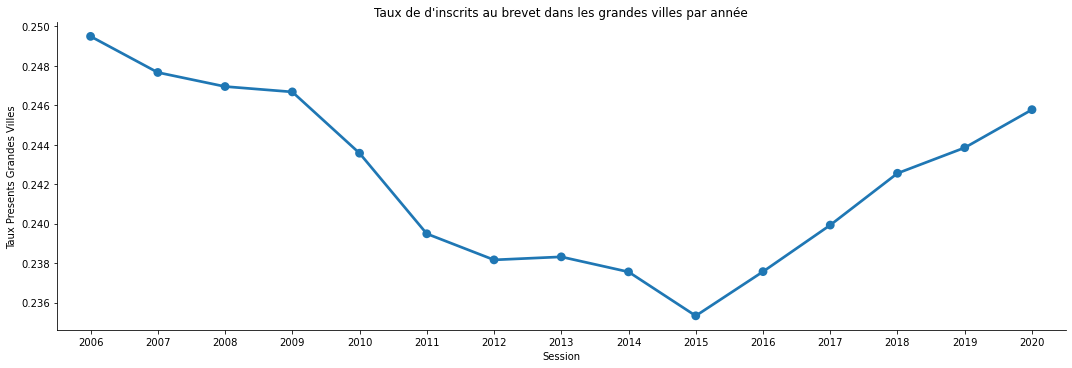

In [24]:
g = sns.catplot(data=brevet_data_grandes_villes, x='Session', y = "Taux Presents Grandes Villes", kind = 'point', aspect = 3, title = c)
g.set(title=f"Taux de d'inscrits au brevet dans les grandes villes par année")

Le nombre d'inscrits au brevet dans les plus grandes villes reste constant de 2006 à 2020

On peut remarquer une baisse de 1.2 %  du nombre d'inscrits au brevet dans les grandes villes de 2006 à 2016